In [1]:
""" 
Analyse sequential samples in stream sampled by ClipSampler in user streams.
Per user we display the actual input-video in the stream + show the labels and meta-data.
"""
import pandas as pd
import numpy as np
from collections import Counter
import os.path as osp
import json
import matplotlib.pyplot as plt
import pickle

# Print all variables on their own lines
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_rows', 1000)


In [2]:
"""First run dataset saving script that saves all per-sample entries in the stream."""
train_usersummary_file_nooverlap = "/home/matthiasdelange/sftp_remote_projects/ContextualOracle_Matthias/results/ego4d_action_recog/summarize_streams/logs/2022-08-04_18-05-40_UID8f0427cb-8048-47d5-b70e-bc3878a1cb3a/dataset_entries_train_ego4d_LTA_train_usersplit_10users_pickle.ckpt"
train_usersummary_file_1s_stride = "/home/matthiasdelange/sftp_remote_projects/ContextualOracle_Matthias/exps/ego4d_action_recog/summarize_streams/../../..//results/ego4d_action_recog/summarize_streams/logs/2022-08-05_14-42-08_UID91c63b64-d6ee-4962-a83b-aeaaf4df7ccf/dataset_entries_train_ego4d_LTA_train_usersplit_10users.ckpt"
train_usersummary_file_nooverlap_include_videpaths = "/home/matthiasdelange/sftp_remote_projects/ContextualOracle_Matthias/exps/ego4d_action_recog/summarize_streams/../../..//results/ego4d_action_recog/summarize_streams/logs/2022-09-06_18-43-43_UIDc4605fd4-8f70-4fcd-bee2-e16b5dd22820/dataset_entries_train_ego4d_LTA_train_usersplit_10users.ckpt"
FILE_TO_ANALYZE = train_usersummary_file_nooverlap_include_videpaths


with open(FILE_TO_ANALYZE, 'rb') as f:
    ds = pickle.load(f)
#     analyze_obj = json.load(p)

'First run dataset saving script that saves all per-sample entries in the stream.'

In [3]:
"""Single entry looks like:"""
ds['104.0'][0]

'Single entry looks like:'

{'clip_start_sec': 4.887695266666682,
 'clip_end_sec': 7.021028600000015,
 'noun_label': 97,
 'noun': 'cloth_(cloth,_fabric,_garment,_kanga,_rag)',
 'verb_label': 34,
 'verb': 'hit_(knock,_hit,_hammer)',
 'action_idx': 0,
 'parent_video_scenarios': ['Cleaning / laundry'],
 'user_id': '104.0',
 'aug_index': 0,
 'clip_index': 0,
 'video_path': '/home/matthiasdelange/sftp_remote_projects/ContextualOracle_Matthias/exps/ego4d_action_recog/summarize_streams/../../..//forecasting/data/long_term_anticipation/clips_root_local/clips/7bf181c6-4194-42ff-9d00-16a683443de1.mp4'}

In [4]:
all_users = list(ds.keys())
all_users

['104.0',
 '108.0',
 '24.0',
 '265.0',
 '27.0',
 '29.0',
 '30.0',
 '324.0',
 '421.0',
 '68.0']

In [5]:
SELECTED_USER = '104.0'

  1%|█▊                                                                                                                    | 10/668 [00:00<00:00, 6123.07it/s]

(entry 10) USER 104.0: 34.3s-36.4s, action_idx=7
LABEL	put_(place,_leave,_drop)-cloth_(cloth,_fabric,_garment,_kanga,_rag)
SCENARIO	['Cleaning / laundry']


True

True

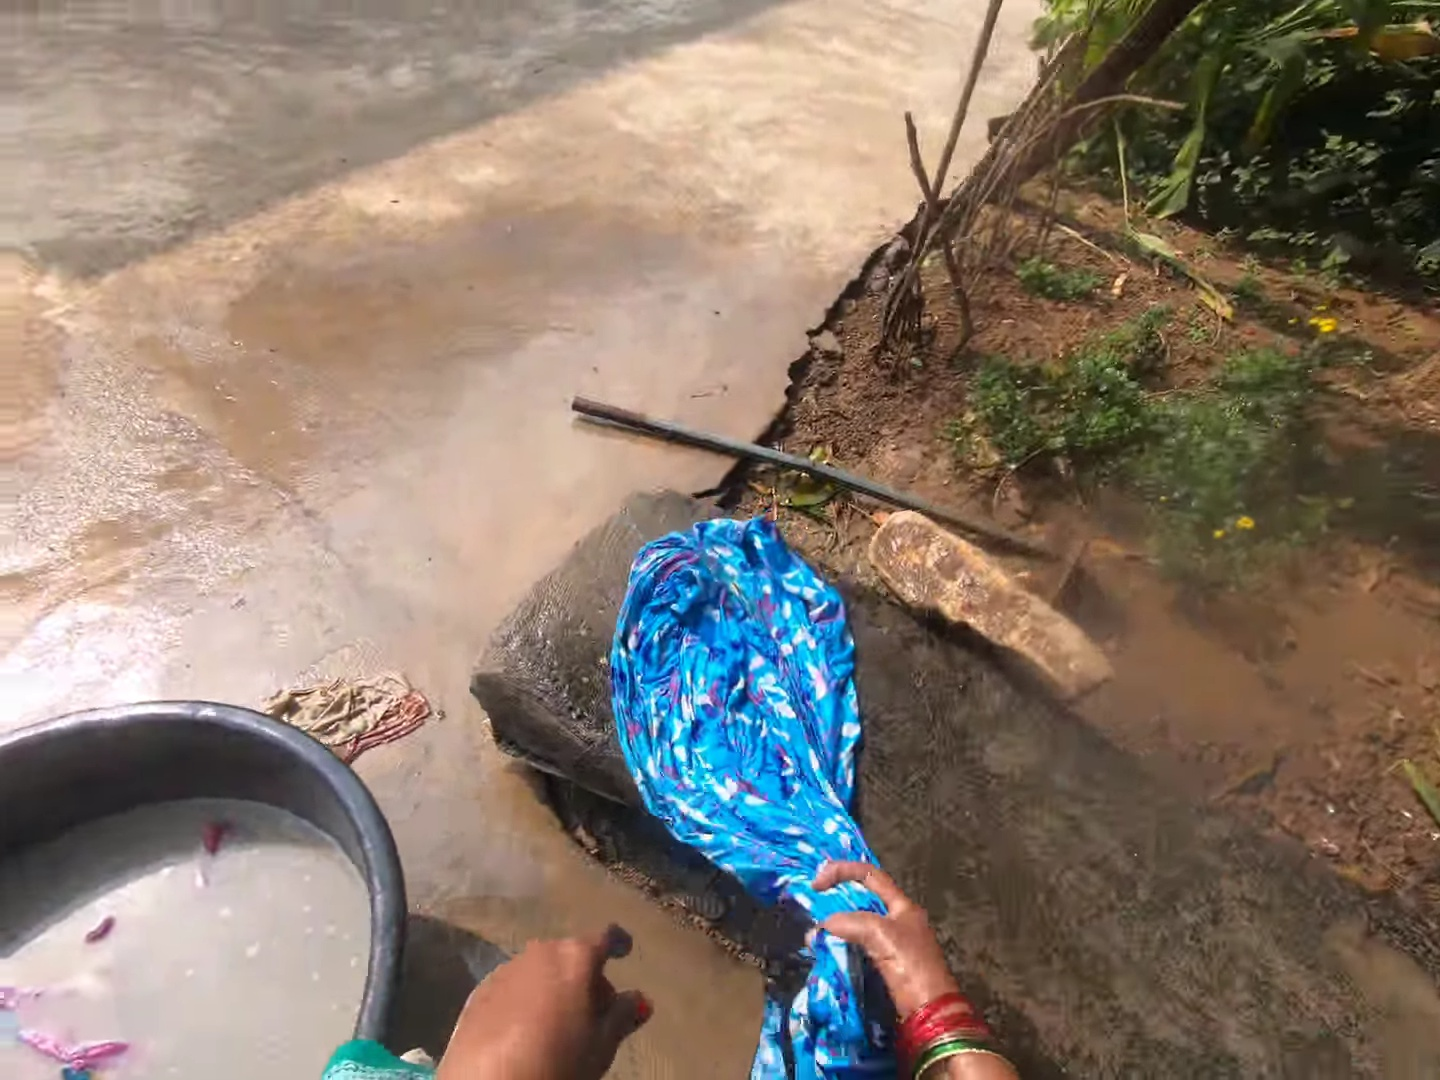

In [ ]:
import cv2
from IPython.display import display, Image, clear_output
# InteractiveShell.ast_node_interactivity = "all"
from tqdm import tqdm

def draw_label(img, text, pos, bg_color):
    font_face = cv2.FONT_HERSHEY_SIMPLEX
    scale = 0.8
    color = (255, 0, 0)
    thickness = cv2.FILLED
    margin = 2
    txt_size = cv2.getTextSize(text, font_face, scale, thickness)

    end_x = pos[0] + txt_size[0][0] + margin
    end_y = pos[1] - txt_size[0][1] - margin

    cv2.rectangle(img, pos, (end_x, end_y), bg_color, thickness)
    cv2.putText(img, text, pos, font_face, scale, color, 1, cv2.LINE_AA)


user_sequence = ds[SELECTED_USER]
pbar = tqdm(total=len(user_sequence))

initial = True
entry_idx = 0
cmd = None


while cmd != 'q':
    
    if initial:
        cmd='r' # Replay first instance
        initial=False
    else:
        cmd = input()
    
    try:
        cmd = int(cmd)
        entry_idx = cmd
        print(f"Playing from annotation number entry idx: {entry_idx}")
    except:
        if cmd == 'n':
            entry_idx+=1
            print(f'Playing next video:{entry_idx}')
        elif cmd == 'r':
            print(f'Replaying video {entry_idx}')
        elif cmd == 'q':
            print('Quiting video watcher')
            break
        else:
            raise ValueError('cmd not recognized')
    
    # Overwrite previous output of video and label
    pbar.reset()
    clear_output(wait=True)
    
    entry = user_sequence[entry_idx]
    video_path = entry['video_path']
    clip_start_msec = entry['clip_start_sec'] * 1000
    clip_end_msec = entry['clip_end_sec'] * 1000
    
#     'clip_start_sec': 4.887695266666682,
#      'clip_end_sec': 7.021028600000015,
#      'noun_label': 97,
#      'verb_label': 34,
#      'action_idx': 0,
#      'parent_video_scenarios': ['Cleaning / laundry'],
#      'user_id': '104.0',
        
    info_str = "(entry {}) USER {}: {:.1f}s-{:.1f}s, action_idx={}".format(
        entry_idx,
        entry['user_id'],
        entry['clip_start_sec'],
        entry['clip_end_sec'],
        entry['action_idx'],

    )
    print(info_str)
    print("LABEL\t{}-{}".format(entry['verb'],entry['noun'],))
    print("SCENARIO\t{}".format(entry['parent_video_scenarios'], ))
    pbar.update(entry_idx)
    pbar.refresh()
    
    # Video
    # See API to set video start/end times: https://docs.opencv.org/3.4/d4/d15/group__videoio__flags__base.html#gaeb8dd9c89c10a5c63c139bf7c4f5704d
    video = cv2.VideoCapture(video_path)
    video.set(cv2.CAP_PROP_POS_MSEC, clip_start_msec)
    display_handle=display(None, display_id=True)
    
    try:
        while video.get(cv2.CAP_PROP_POS_MSEC) <= clip_end_msec:
            _, frame = video.read()
            _, frame = cv2.imencode('.jpeg', frame)
    
            draw_label(frame,"HELLOW", (50,50),(255,0,0))
            display_handle.update(Image(data=frame.tobytes()))
    except KeyboardInterrupt:
        break
    finally:
        video.release()

display_handle.update(None)
pbar.close()
        

In [ ]:
"""
Interesting examples:

## Some examples are extremely hard as action is out-of-focus



### USER 104: Is one of the users that improves in AG

- Along most of the line, the same noun is used: clothes. Many different actions, but just predicting a single noun.
Verbs differ from take/squeeze/smash/...
    (entry 140) USER 104.0: 104.6s-106.8s, action_idx=16
    LABEL	dip-cloth_(cloth,_fabric,_garment,_kanga,_rag)
    SCENARIO	['Cleaning / laundry']

The user is washing stuff, but looks the other way, the 2s context is barely enough to know what is doing with hands (only initial fraction of second).

### Case 

"""